In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
train['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
train.area_code = train.area_code.map({'area_code_415':415,'area_code_408':408,'area_code_510':510})
test.area_code = test.area_code.map({'area_code_415':415,'area_code_408':408,'area_code_510':510})

In [9]:
train = train.replace({'voice_mail_plan':{'yes':1,'no':0}})
test = test.replace({'voice_mail_plan':{'yes':1,'no':0}})

In [10]:
train = train.replace({'international_plan':{'yes':1,'no':0}})
test = test.replace({'international_plan':{'yes':1,'no':0}})

In [11]:
train = train.replace({'churn':{'yes':1,"no":0}})
test = test.replace({'churn':{'yes':1,"no":0}})

In [12]:
train.state = train.state.astype('category')
test.state = test.state.astype('category')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   int64   
 3   international_plan             4250 non-null   int64   
 4   voice_mail_plan                4250 non-null   int64   
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

In [14]:
import seaborn as sns

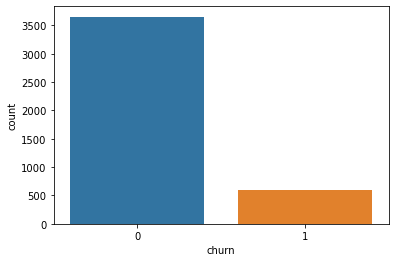

In [15]:
sns.countplot(x = 'churn',data = train)

In [16]:
corr_matrix = train.corr()
corr_matrix

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.019969,0.027050,0.001663,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
area_code,-0.019969,1.000000,0.027863,-0.008344,-0.007127,-0.008200,-0.034485,-0.008204,0.010856,-0.008468,0.010870,0.006754,0.018148,0.006743,-0.006417,-0.019411,-0.006514,0.022880,0.015964
international_plan,0.027050,0.027863,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.259053
voice_mail_plan,0.001663,-0.008344,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.114643
number_vmail_messages,-0.006626,-0.007127,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,-0.008200,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,-0.034485,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,-0.008204,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.010856,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,-0.008468,-0.003004,0.000263,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817


In [17]:
import matplotlib.pyplot as plt

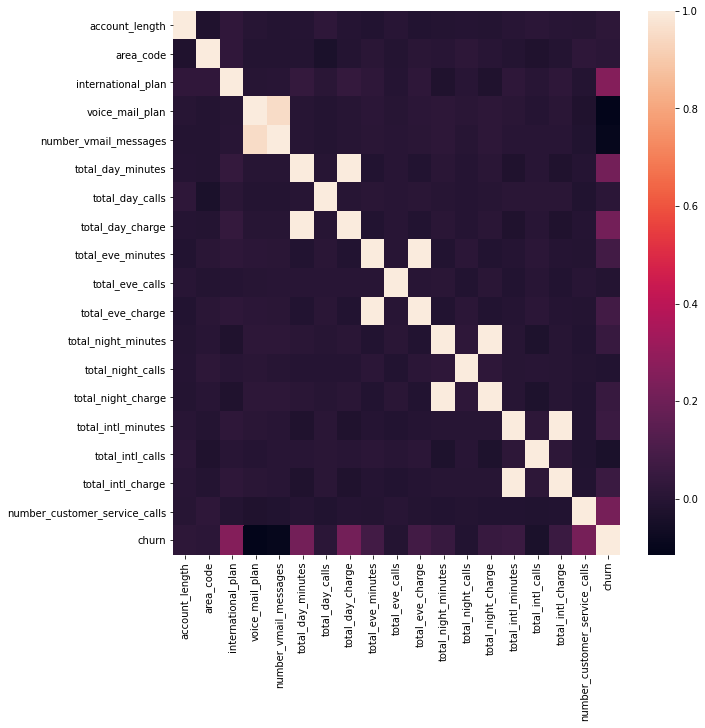

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix)

In [20]:
col_drop = ['total_day_minutes','total_night_minutes','total_eve_minutes','total_intl_minutes']

In [21]:
train = train.drop(columns = col_drop,axis = 1)
test = test.drop(columns = col_drop,axis = 1)


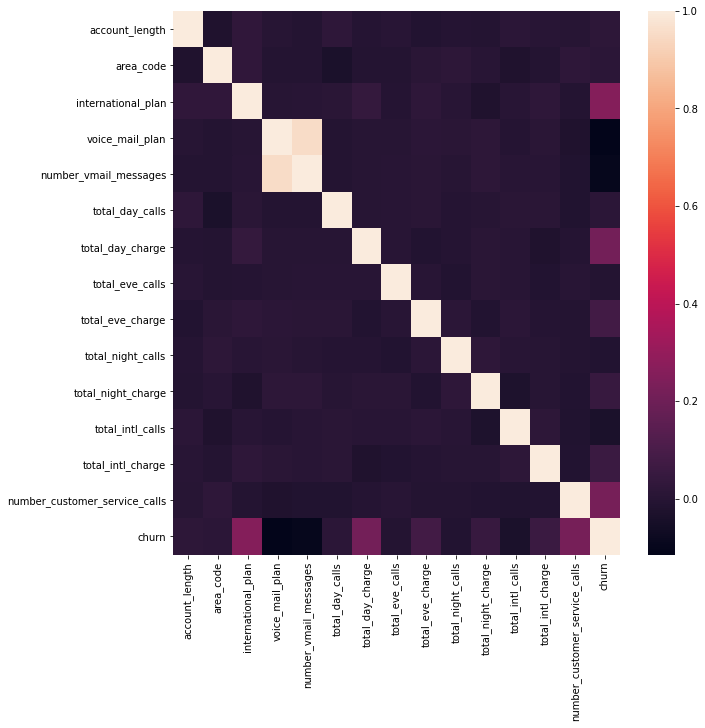

In [22]:
corr_matrix = train.corr()
corr_matrix
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix)

In [23]:
X = train.drop(['state','churn'],axis = 1)
y = train['churn']

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [25]:
df = pd.DataFrame(X_std, index = train.index, columns = train.columns[1:15])

In [26]:
df['state'] = train['state']
df['churn'] = train['churn']

In [27]:
train.index

RangeIndex(start=0, stop=4250, step=1)

In [28]:
X_new = df.drop(['state','churn'],axis = 1)
y_new = df['churn']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size = 0.3,random_state = 42)

In [31]:
X_train.shape,y_train.shape

((2975, 14), (2975,))

In [32]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 42)
for_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [33]:
predict = for_reg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(predict.round(),y_test)

0.9537254901960784

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = [{'n_estimators':[10,100,1000] ,'max_features':[2,4,6,8,16]}] 

In [40]:
grid_search = GridSearchCV(for_reg,param_grid,cv = 3,scoring = 'neg_mean_squared_error',return_train_score = True,n_jobs = 3)

In [41]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=3,
             param_grid=[{'max_features': [2, 4, 6, 8, 16],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, random_state=42)

In [44]:
y_pred = grid_search.predict(X_test)


In [45]:
y_pred = y_pred.round()

In [46]:
score = accuracy_score(y_pred,y_test)

In [47]:
print( "Accuracys is"+" "+ str(score*100),"%")

Accuracys is 95.45098039215686 %


In [48]:
X_new_test = test.drop(['id','state'],axis = 1)

In [49]:
X_new_test.shape

(750, 14)

In [50]:
X_new_test

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,118,510,1,0,0,98,37.98,101,18.75,118,9.18,6,1.70,0
2,62,415,0,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4
3,93,510,0,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3
4,174,415,0,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,415,0,0,0,99,20.30,97,19.24,111,9.12,7,3.05,0
746,73,408,0,0,0,118,30.12,84,22.99,112,10.88,2,3.32,3
747,152,415,0,0,0,90,31.31,73,21.83,113,9.61,2,3.97,3
748,61,415,0,0,0,89,23.90,128,14.69,97,9.56,4,3.67,1


In [51]:
X_test_std = scaler.fit_transform(X_new_test)

In [52]:
df_test = pd.DataFrame(X_test_std,columns = test.columns[2:])

In [53]:
predict_test = grid_search.predict(df_test)

In [54]:
pred_value_1 = predict_test.round()

In [55]:
import numpy as np

In [56]:
pred_value_1 = np.where(pred_value_1 == 0,'no','yes')

In [57]:
pred_value_1

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no',

In [58]:
model=grid_search

In [59]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [60]:
df_test

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.696065,-0.530150,-0.338250,1.598281,1.172240,0.470870,1.590686,-0.065790,-0.112140,-0.488757,0.874772,-0.613702,-0.106976,-0.497639
1,0.444001,1.713048,2.956393,-0.625672,-0.599015,-0.138101,0.807063,0.037545,0.332287,0.919514,0.085085,0.625821,-1.445297,-1.281734
2,-0.967554,-0.530150,-0.338250,-0.625672,-0.599015,-1.559032,-1.122705,-1.254136,1.992682,-0.071491,0.067824,0.625821,1.017213,1.854646
3,-0.186157,1.713048,-0.338250,-0.625672,-0.599015,0.673860,0.192544,0.554217,0.287167,1.075989,-1.360517,-0.613702,-0.789520,1.070551
4,1.855557,-0.530150,-0.338250,-0.625672,-0.599015,-1.254547,-1.055285,0.605885,1.415153,0.763040,0.991283,0.212647,1.887122,1.070551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.746477,-0.530150,-0.338250,-0.625672,-0.599015,-0.087353,-1.147021,-0.169124,0.442829,0.554407,0.059193,1.038996,0.361436,-1.281734
746,-0.690284,-0.695439,-0.338250,-0.625672,-0.599015,0.876850,-0.061664,-0.840798,1.288819,0.606565,0.818674,-1.026876,0.722782,1.070551
747,1.301017,-0.530150,-0.338250,-0.625672,-0.599015,-0.544081,0.069861,-1.409138,1.027126,0.658723,0.270640,-1.026876,1.592691,1.070551
748,-0.992760,-0.530150,-0.338250,-0.625672,-0.599015,-0.594829,-0.749130,1.432561,-0.583638,-0.175808,0.249064,-0.200527,1.191195,-0.497639


In [61]:
df_test.to_csv('test_df.csv')

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(df_test)
pred1 = predict_test.round()
pred = np.where(pred1 == 0,'no','yes')
pred

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no',